In [1]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [3]:
pwd

'C:\\Users\\Saumya\\B2-2M4E BATCH NALAIYA THIRAN'

In [39]:
# loading the dataset

df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [ ]:
# if we have null values in the numerial column replace it with mean or median.
# if we have null values in the categorical column you have to replace it with mode.

In [ ]:
## numerical column - null values replacement

# df['age'].fillna(df['age'].mean(),inplace=True) 

OR

# df['age'].fillna(df['age'].median(),inplace=True) 

In [ ]:
## categorical column - null values replacement

# df['smoker'].fillna(df['smoker'].mode(),inplace=True) 


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [9]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Visualization

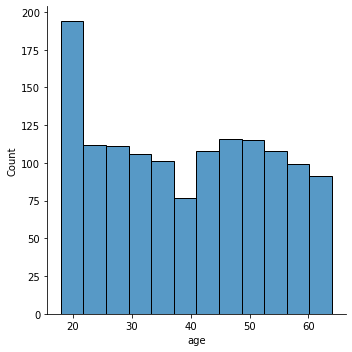

In [13]:
sns.displot(df.age)

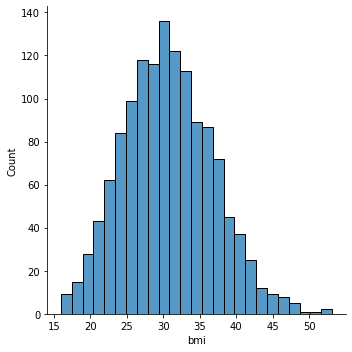

In [14]:
sns.displot(df.bmi)

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

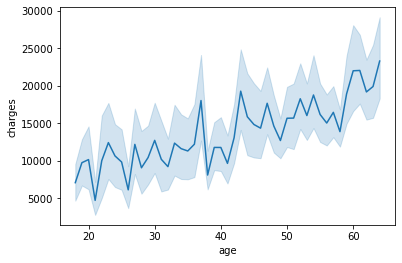

In [15]:
sns.lineplot(df.age,df.charges)

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='bmi'>

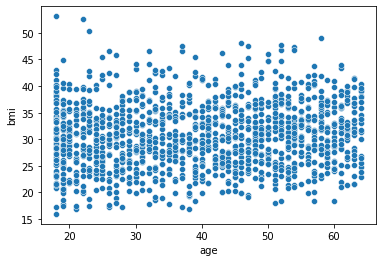

In [17]:
sns.scatterplot(df.age,df.bmi)

Text(0.5, 1.0, 'SMOKER')

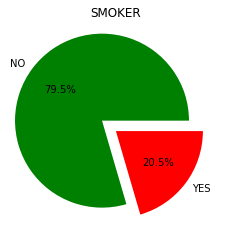

In [23]:
plt.pie(df.smoker.value_counts(),[0.2,0],labels=['NO','YES'],autopct="%1.1f%%",colors=['green','red'])
plt.title('SMOKER')

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='region'>

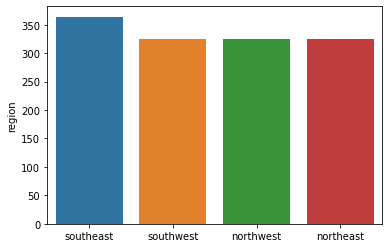

In [25]:
sns.barplot(df.region.value_counts().index,df.region.value_counts())

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='sex'>

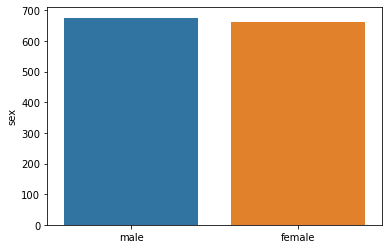

In [26]:
sns.barplot(df.sex.value_counts().index,df.sex.value_counts())

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

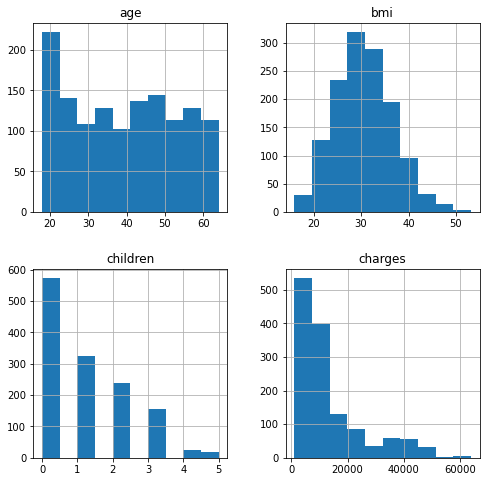

In [28]:
df.hist(figsize=(8,8))

Text(0.5, 1.0, 'REGION')

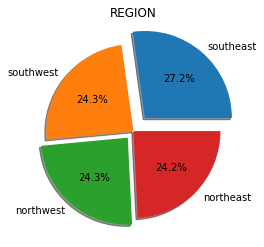

In [32]:
# region

plt.pie(df.region.value_counts(),[0.2,0,0.1,0],shadow=True,labels=['southeast','southwest','northwest','northeast'],autopct="%1.1f%%")
plt.title('REGION')


## outlier detection

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

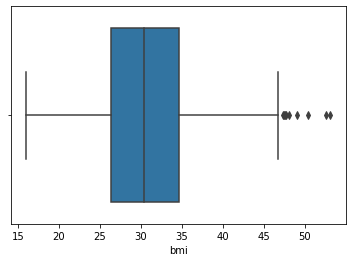

In [33]:
sns.boxplot(df.bmi)

In [ ]:
# z-score, percentile, iqr

## Ourlier removal using IQR

In [34]:
q1=df.bmi.quantile(0.25)  #(Q1)
q3=df.bmi.quantile(0.75)  #(Q3)

In [35]:
IQR=q3-q1

In [36]:
upper_limit= q3 + 1.5*IQR

lower_limit= q1 - 1.5*IQR

In [37]:
df=df[df.bmi<upper_limit]

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

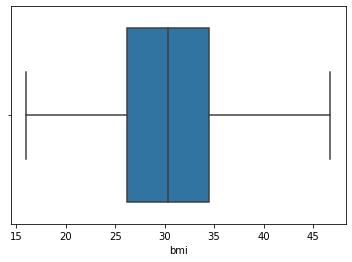

In [38]:
sns.boxplot(df.bmi)

## outlier removal with percentile

C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

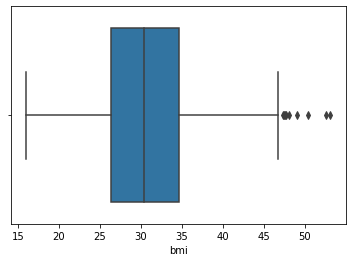

In [41]:
sns.boxplot(df.bmi)

In [43]:
p99= df.bmi.quantile(0.99)
p99

46.40789999999996

In [44]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
df=df[df.bmi<=p99]


C:\Users\Saumya\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

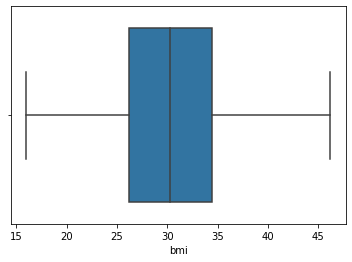

In [46]:
sns.boxplot(df.bmi)

In [47]:
df.shape

(1324, 7)

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Encoding Techniques

## 1.label encoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()

In [52]:
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)

In [54]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


## 2.One hot encoding

In [55]:
df_main=pd.get_dummies(df,columns=['region'])
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [56]:
df_main.corr()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.016501,0.115670,0.040913,-0.024410,0.301754,0.001921,-0.000131,-0.010289,0.008804
sex,-0.016501,1.000000,0.038665,0.020772,0.080410,0.065004,0.000986,-0.009573,0.007403,0.000986
bmi,0.115670,0.038665,1.000000,0.004627,0.002354,0.200882,-0.132316,-0.124586,0.248115,0.001697
children,0.040913,0.020772,0.004627,1.000000,0.010016,0.071393,-0.022324,0.027045,-0.025542,0.021521
smoker,-0.024410,0.080410,0.002354,0.010016,1.000000,0.785872,0.003868,-0.037068,0.070897,-0.039720
charges,0.301754,0.065004,0.200882,0.071393,0.785872,1.000000,0.008765,-0.038750,0.074616,-0.046761
region_northeast,0.001921,0.000986,-0.132316,-0.022324,0.003868,0.008765,1.000000,-0.323999,-0.342501,-0.322677
region_northwest,-0.000131,-0.009573,-0.124586,0.027045,-0.037068,-0.038750,-0.323999,1.000000,-0.343904,-0.323999
region_southeast,-0.010289,0.007403,0.248115,-0.025542,0.070897,0.074616,-0.342501,-0.343904,1.000000,-0.342501
region_southwest,0.008804,0.000986,0.001697,0.021521,-0.039720,-0.046761,-0.322677,-0.323999,-0.342501,1.000000


<AxesSubplot:>

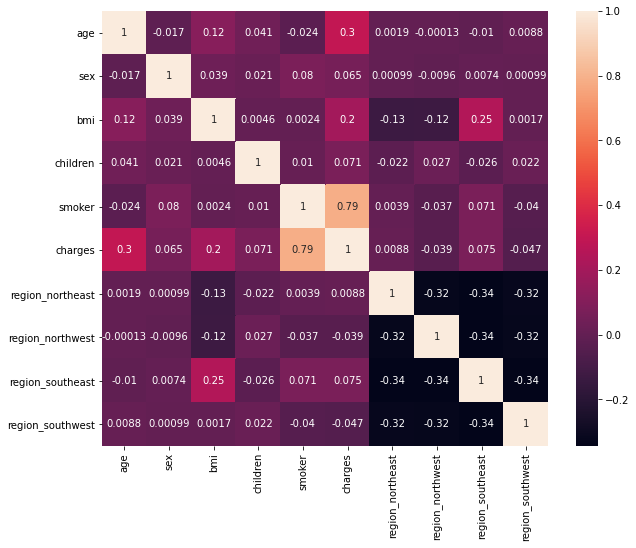

In [58]:
plt.figure(figsize=(10,8))
sns.heatmap(df_main.corr(),annot=True)

In [64]:
df_main.corr().charges.sort_values(ascending=False)

charges             1.000000
smoker              0.785872
age                 0.301754
bmi                 0.200882
region_southeast    0.074616
children            0.071393
sex                 0.065004
region_northeast    0.008765
region_northwest   -0.038750
region_southwest   -0.046761
Name: charges, dtype: float64

In [59]:
df_main.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## X and y split

In [60]:
# dependent variable

y=df_main['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1324, dtype: float64

In [63]:
#independent variable

X=df_main.drop(columns=['charges'],axis=1)
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


## Scaling

In [66]:
from sklearn.preprocessing import scale


In [71]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.437472,-1.007582,-0.440776,-0.906355,1.971195,-0.568047,-0.570373,-0.602945,1.760418
1,-1.508633,0.992475,0.563375,-0.075320,-0.507307,-0.568047,-0.570373,1.658526,-0.568047
2,-0.797019,0.992475,0.431655,1.586748,-0.507307,-0.568047,-0.570373,1.658526,-0.568047
3,-0.441212,0.992475,-1.329458,-0.906355,-0.507307,-0.568047,1.753239,-0.602945,-0.568047
4,-0.512373,0.992475,-0.273132,-0.906355,-0.507307,-0.568047,1.753239,-0.602945,-0.568047


## Train test split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=0)